In [1]:
import scipy
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from matplotlib import colors as mcolors

df = pd.read_csv('imdb_top_1000.csv')
df = df.drop_duplicates(subset="Series_Title", keep=False)

print(df)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title  Released_Year Certificate  Runtime  \
0    The Shawshank Redemption           1994           A  142 min   
1               The Godfather           1972           A  175 min   
2             The Dark Knight           2008          UA  152 min   
3      The Godfather: Part 

## Network 1: Movies by Reoccuring Actors

### Network Specifications
**Node Count**: 1000 (1000 movies)<br/>
**Weighted Undirected Graph**: Where weight is equal to the amount of reoccuring actors between two movies. Edges are undirected as there will be the same amount of connected actors between each movie<br/>
**Max Weight**: 4 (Database only includes the four "star" actors of a movie)<br/>

In this network our goal to find any connections between successfull movies and their actors. We want to see if there are any types of clustering that occurs when we do this. We're hoping to see if movies in the top 1000 in IMDB tend to be those who have famous actors.<br/> <br/>
We are expecting that many of the movies that have few connections are ones that are from different movie industries (Bolleywood vs Hollywood).


In [2]:
rows = []
G = nx.Graph()

# Getting eaching movies name, stars (in one array) and genre
for index, row in df.iterrows():
    rows.append((row["Series_Title"], [row["Star1"], row["Star2"], row["Star3"], row["Star4"]], row["Released_Year"]))
    G.add_node(row["Series_Title"], genre=row["Genre"], year=row["Released_Year"])


titles = [movie[0] for movie in rows]   

# Create edges between movies with the same actors. Weight of the edge is equal to the number of shared actors between the movies
for i in range(len(titles)):
    for j in range(i+1, len(titles)):
        weight = len(set(rows[i][1]).intersection(set(rows[j][1])))
        if weight >= 1:
            G.add_edge(rows[i][0], rows[j][0], weight=weight)

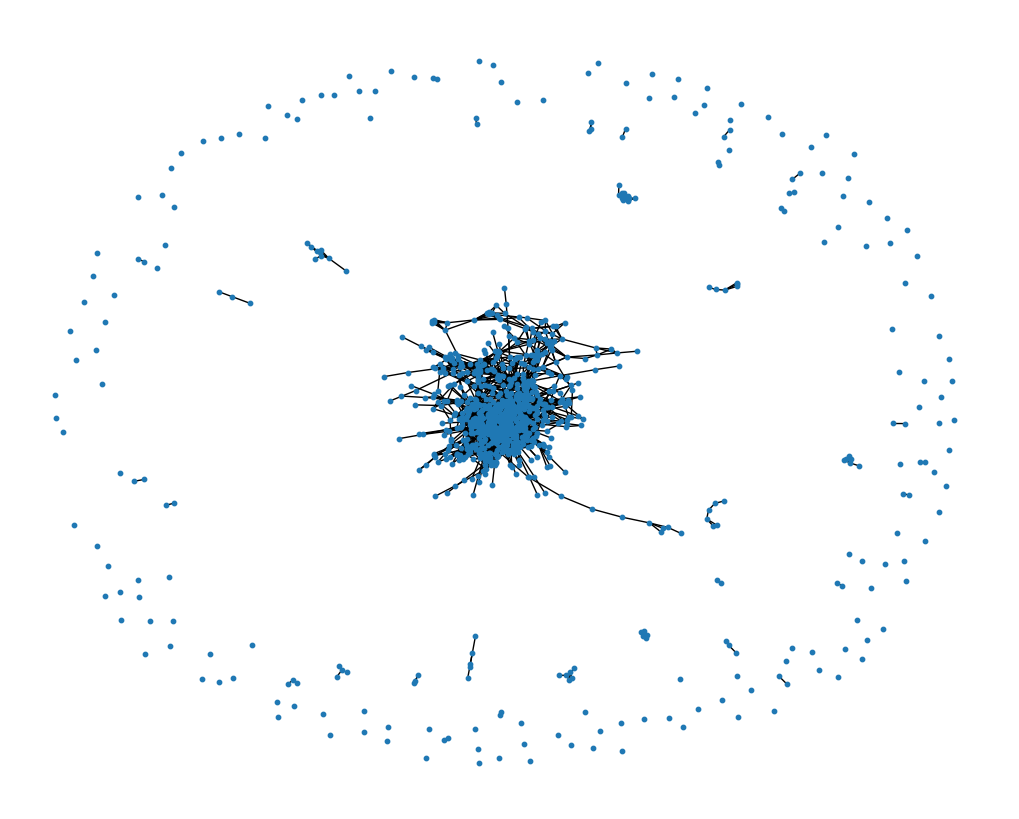

In [3]:
plt.figure(figsize=(10, 8))  
nx.draw(G, node_size=10)

Initial network. Here we can see that there is a big cluster in the middle. With out preconcieved notion we believe that these nodes in the center are likely to be movies with famous actors. Hence why there is a giant cluster in the center. <br/><br/>
Outside of the giant cluster in the center there are also smaller clusters on the edges with 4-10 nodes. Which we assume to be nodes from non-american movies. <br/><br/>
Lastly the movies at the very edges of the network are movies with 0 connections. Which means that they have actors with smaller careers.

Number of edges 2798


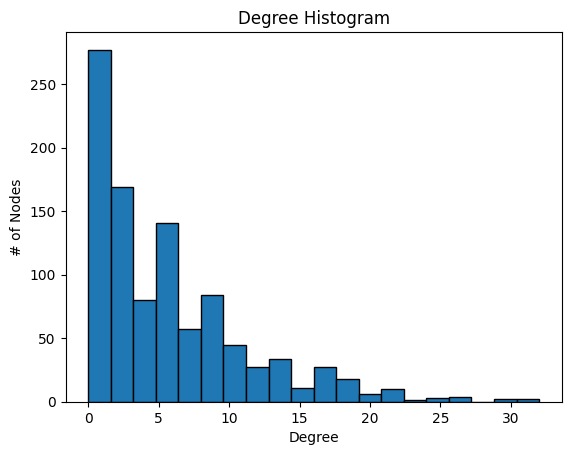

In [4]:
print("Number of edges", G.number_of_edges())

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
plt.hist(degree_sequence, bins=20, edgecolor="k")
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.show()

In [5]:
degree_sequence = sorted(((d, n) for n, d in G.degree()), reverse=True)
print("Movies top 25 movies with the most connections")
for degree, movie in degree_sequence[0:25]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    print( '{:<50s} {:<15s} {:<10s}'.format(string_one, string_two, string_three) )

print("")

for degree, movie in degree_sequence[len(degree_sequence)-24:]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    print( '{:<50s} {:<15s} {:<10s}'.format(string_one, string_two, string_three) )

Movies top 25 movies with the most connections
Movie: The Godfather: Part II                      Degree: 32      	Year: 1974
Movie: Sleepers                                    Degree: 32      	Year: 1996
Movie: Heat                                        Degree: 30      	Year: 1995
Movie: The Irishman                                Degree: 29      	Year: 2019
Movie: The Prestige                                Degree: 27      	Year: 2006
Movie: The Departed                                Degree: 27      	Year: 2006
Movie: The Big Short                               Degree: 27      	Year: 2015
Movie: Catch Me If You Can                         Degree: 27      	Year: 2002
Movie: Ocean's Eleven                              Degree: 25      	Year: 2001
Movie: Saving Private Ryan                         Degree: 24      	Year: 1998
Movie: Donnie Brasco                               Degree: 24      	Year: 1997
Movie: The Untouchables                            Degree: 23      	Year: 1987
Movie

Looking at the movies with the highest degrees we can see a few trends. 
1) Many of the movies are created between 1970-2015
2) Each movie is a live action movie
3) Movies primarly compose of American / english speaking actors (Hollywood)

Looking at the movies with the lowest degrees we can see the opposite:
1) The movies release years have a wider range. 
2) We see more animated movies
3) We see movies that are created outside of the of Hollywood (Akira, Auf der anderen Seite, Au revoir les enfants

This verifies some of our initial assumptions. Many of the movies with the most conenctions comprise of actors that do Hollywood 
films. Another thing that the degree histogram helps us see is that many of the movies are of a certain range. This makes sense
since IMDB first launched in 1990. Which means that many older movies are less likely to have had an active amount of members
rate them. Additionally movies popularity began to sky rocket some time after the 1950s so many of the older actors from 
those times are less likely to appear in numerous amounts of popular movies. One last observation is that some movies for non
english audiences have 0 degrees. This makes sense considering that IMDB is an primarly engish based website so it is less likely
for movies outside of this demographic to be rated highly.

### Network Recolour (Colour based on movie release date)

#### Darker colours = Newer Movies
#### Movies colours = Older Movies

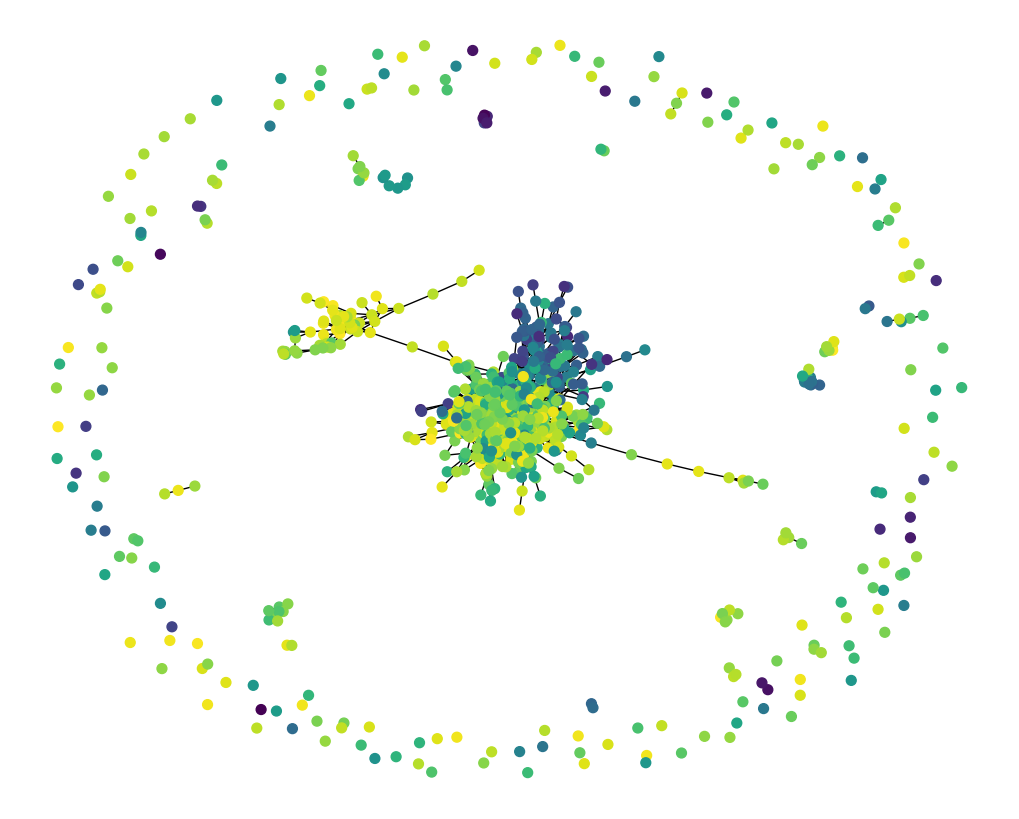

In [6]:
# Darker colours = Newer Movies
# Lighter colours = Older Movies

release_years = []
for row in rows:
    release_years.append(row[2])

year_max = max(release_years)
year_min = min(release_years)

norm = plt.Normalize(year_min, year_max)
cmap = cm.get_cmap('viridis')

node_colors = [cmap(norm(year)) for year in release_years]

plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
nx.draw(G, node_color=node_colors, node_size=50)

### Network Recolour (Colour based on community)

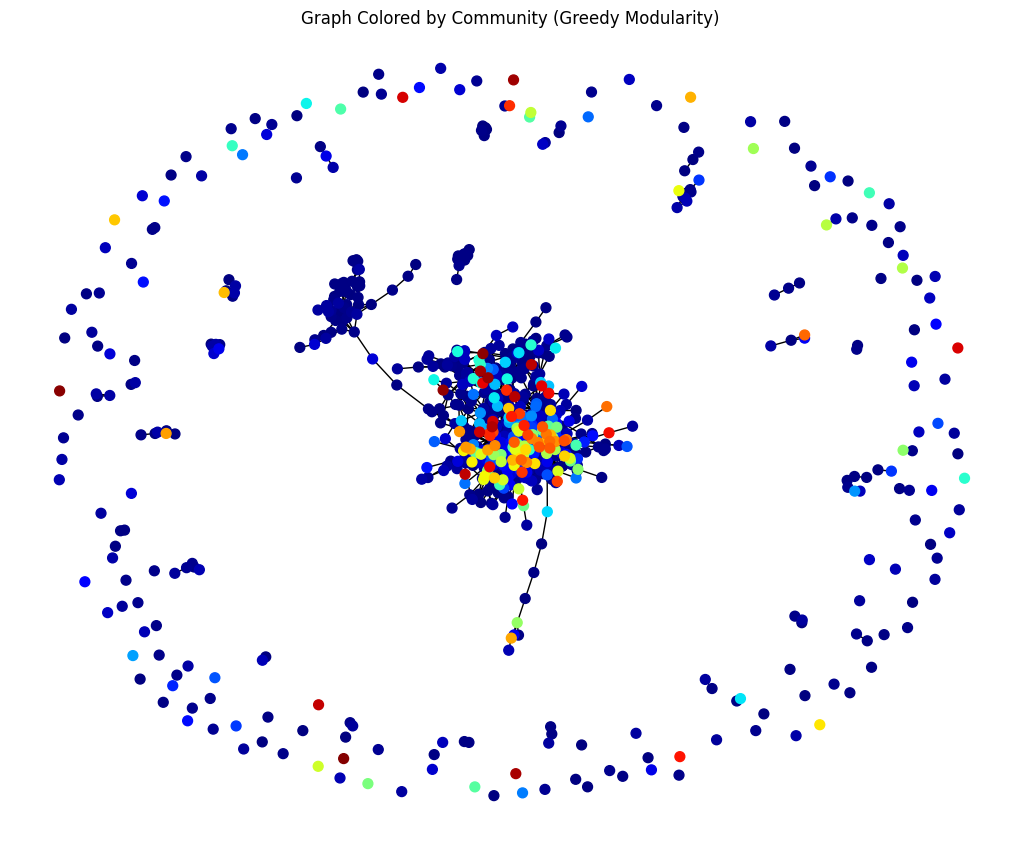

In [7]:
communities = list(nx.community.greedy_modularity_communities(G))

colors = []
for i , community in enumerate(communities):
    for node in community:
        colors.append(i)


plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

node_colors = [plt.cm.jet(c / len(communities)) for c in colors]

nx.draw(G, pos, node_color=node_colors, node_size=50, font_size=10, font_weight='bold')
plt.title("Graph Colored by Community (Greedy Modularity)")
plt.show()

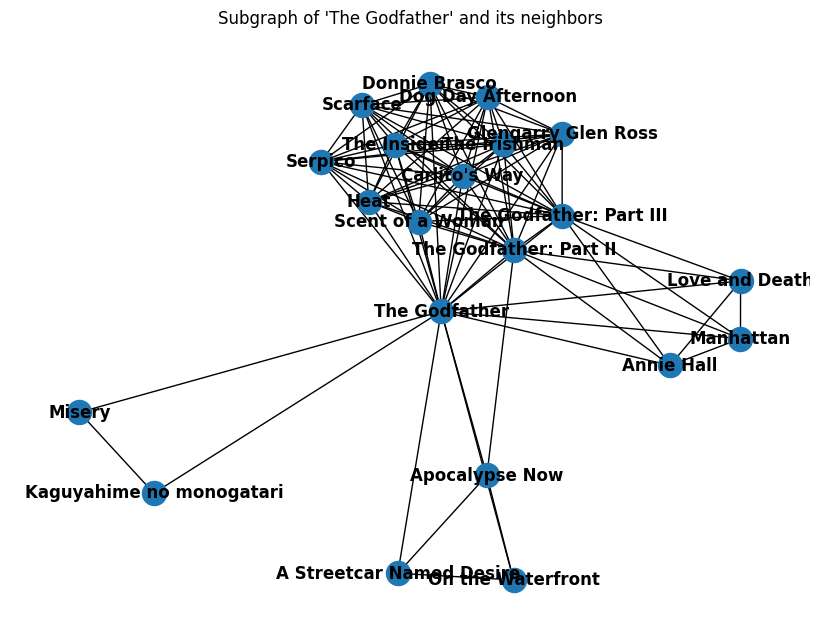

In [8]:
specific_node = 'The Godfather'

neighbors = list(G.neighbors(specific_node))

subgraph_nodes = [specific_node] + neighbors
subgraph = G.subgraph(subgraph_nodes)

plt.figure(figsize=(8, 6))
nx.draw(subgraph, with_labels=True, font_weight='bold')
plt.title(f"Subgraph of '{specific_node}' and its neighbors")
plt.show()


In [9]:
ccs = nx.closeness_centrality(G)
closeness_centarlity = sorted(ccs.items(), key=lambda movie: movie[1], reverse=True)

for movie in closeness_centarlity:
    print(movie)

('Sleepers', 0.19210101233934365)
('The Big Short', 0.19092162728706163)
('Inside Man', 0.18989295472624773)
('The Insider', 0.18975663530433368)
('The Prestige', 0.188807852127812)
('The Man Who Would Be King', 0.18726956640378098)
('A Beautiful Mind', 0.18674036946586847)
('The Departed', 0.1862797695411817)
('Children of Men', 0.1856256973166691)
('The Dark Knight Rises', 0.18556054263175628)
('The Godfather: Part II', 0.1853003806371797)
('Batman Begins', 0.1849115026085602)
("Ocean's Eleven", 0.1847822390625214)
('Good Will Hunting', 0.1842669870888371)
('Heat', 0.1840104371590232)
('American Gangster', 0.18381849303124953)
('The Bourne Identity', 0.18356318956870613)
('Ford v Ferrari', 0.18349947447340287)
('3:10 to Yuma', 0.18343580359398806)
('Catch Me If You Can', 0.18292802282279366)
('The Girl with the Dragon Tattoo', 0.18280151658294386)
('The Fighter', 0.18280151658294386)
('The Untouchables', 0.18254902830037073)
('The Irishman', 0.18223439708992542)
('Shutter Island', 0.

In [10]:
ccs = nx.betweenness_centrality(G)
closeness_centarlity = sorted(ccs.items(), key=lambda movie: movie[1], reverse=True)

for movie in closeness_centarlity:
    print(movie)

('Lion', 0.08268419371283936)
('Slumdog Millionaire', 0.07680269724837162)
('Barfi!', 0.07556806967085997)
('Rockstar', 0.07432941394464518)
('Airlift', 0.07319562915175051)
('The Girl with the Dragon Tattoo', 0.04232773441358857)
('Her', 0.0339173028333022)
('JFK', 0.022593788117318703)
('The Lunchbox', 0.021842277558522433)
('Charade', 0.02125531471660004)
('Inside Man', 0.020704106278081405)
('The Insider', 0.019077248820736466)
('The Prestige', 0.01862027554948532)
('Magnolia', 0.018493997268662365)
('Dogville', 0.017348387001517918)
('Good Will Hunting', 0.017135807603049964)
('The Dark Knight Rises', 0.01598775782106977)
('Baby', 0.015768951368672218)
('The Lion in Winter', 0.01566015138787846)
('Sleepers', 0.01537315780978949)
('Hera Pheri', 0.015362958082683524)
('The Philadelphia Story', 0.015317501303925578)
('Sabrina', 0.015249213226271062)
('Unforgiven', 0.015240145840709885)
('Donnie Brasco', 0.01519407796282686)
('The Big Short', 0.014714241596510507)
('Catch Me If You Ca

{'genre': 'Action, Adventure, Fantasy', 'year': 1977}


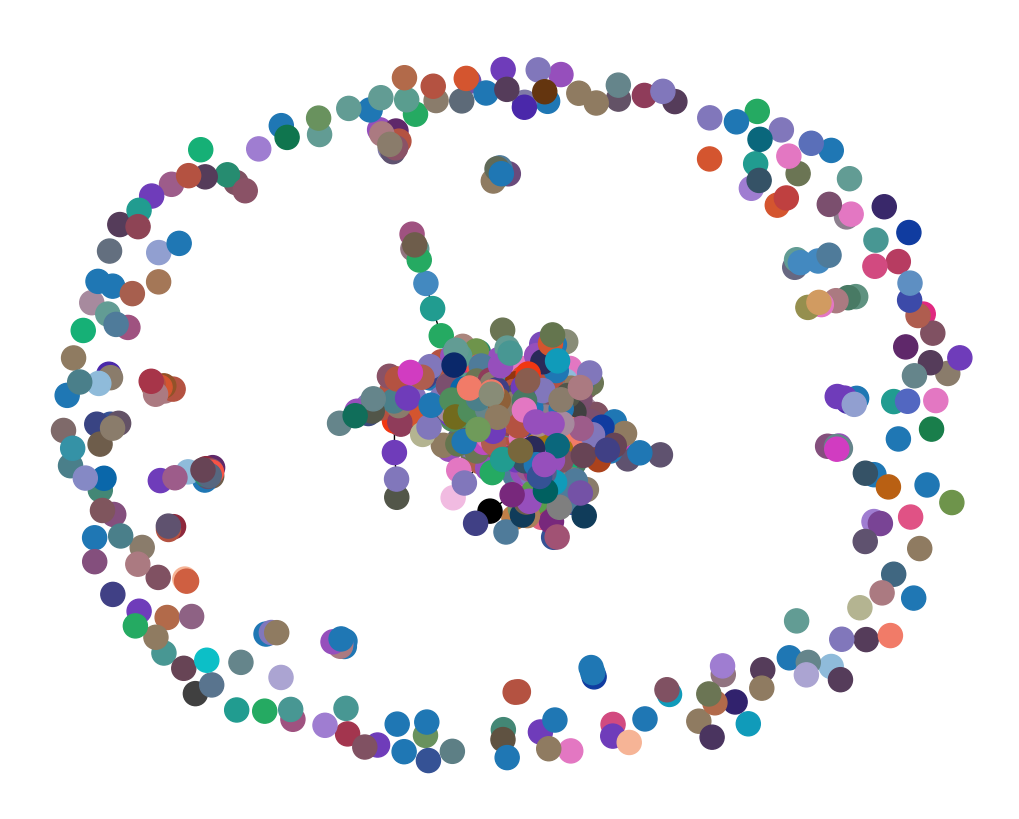

In [11]:
genre_colors = {
    "Drama": 'tab:blue',
    "Crime": 'tab:orange',
    "Action": 'r',
    "Adventure": 'tab:green',
    "Biography": 'tab:red',
    "History": 'tab:brown',
    "Sci-Fi": 'c',
    "Romance": 'm',
    "Western": 'y',
    "Fantasy": 'tab:purple',
    "Comedy": 'tab:pink',
    "Thriller": 'tab:gray',
    "Animation": 'tab:cyan',
    "Family": 'tab:green',
    "War": 'darkred',
    "Mystery": 'darkblue',
    "Music": 'w',
    "Horror": 'k',
    "Musical": 'orange',
    "Film-Noir": 'tab:gray',
    "Sport": 'darkgreen'
}

def blend_colors(genres):
    # Convert genre colors to RGBA (including transparency)
    genres = genres.split(", ")
    colors = [mcolors.to_rgba(genre_colors[genre]) for genre in genres]
    # Average the colors (blend them)
    avg_color = np.mean(colors, axis=0)
    return avg_color

print(G.nodes["Star Wars"])
node_colors = [blend_colors(G.nodes[node]['genre']) for node in G.nodes]

plt.figure(figsize=(10, 8))
nx.draw(G, node_color=node_colors)

# Display the plot
plt.show()


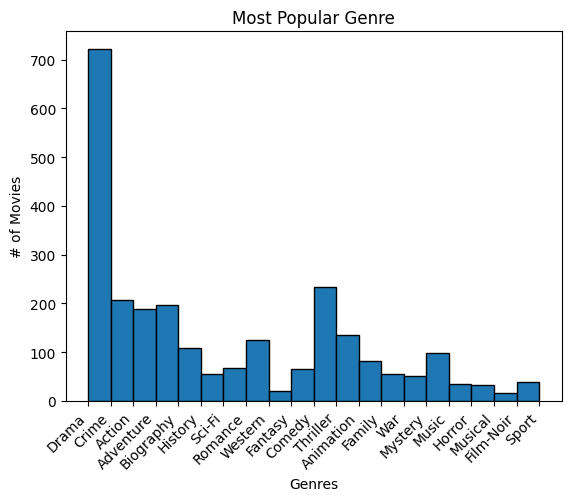

In [12]:
movie_by_genre = []

for index, row in df.iterrows():
    genres = row["Genre"].split(", ")
    title = row["Series_Title"]
    for genre in genres:
        movie_by_genre.append(genre)

plt.hist(movie_by_genre, bins=20, edgecolor="k")
plt.title("Most Popular Genre")
plt.xlabel("Genres")
plt.ylabel("# of Movies")
plt.xticks(rotation=45, ha='right')
plt.show()

# Network 2: Ratings

In [14]:
rows = []
G = nx.Graph()

# Getting eaching movies name, stars (in one array) and genre
for index, row in df.iterrows():
    rows.append((row["Series_Title"], [row["Star1"], row["Star2"], row["Star3"], row["Star4"]], row["Released_Year"], row["IMDB_Rating"], row["Meta_score"]))
    G.add_node(row["Series_Title"], genre=row["Genre"], year=row["Released_Year"], IMDB=row["IMDB_Rating"], meta=row["Meta_score"])


titles = [movie[0] for movie in rows]   

# Create edges between movies with the same actors. Weight of the edge is equal to the number of shared actors between the movies
for i in range(len(titles)):
    for j in range(i+1, len(titles)):
        weight = len(set(rows[i][1]).intersection(set(rows[j][1])))
        if weight >= 1:
            G.add_edge(rows[i][0], rows[j][0], weight=weight)

In [18]:
degree_sequence = sorted(((d, n) for n, d in G.degree()), reverse=True)
print("Movies top 25 movies with the most connections")
for degree, movie in degree_sequence[0:25]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    string_four = "\tIMDB: " + str(G.nodes[movie]['IMDB'])
    string_five = "\tMeta: " + str(G.nodes[movie]['meta'])
    print( '{:<50s} {:<15s} {:<10s} {:<10s} {:<10s}'.format(string_one, string_two, string_three, string_four, string_five) )

print("")

for degree, movie in degree_sequence[len(degree_sequence)-24:]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    string_four = "\tIMDB: " + str(G.nodes[movie]['IMDB'])
    string_five = "\tMeta: " + str(G.nodes[movie]['meta'])
    print( '{:<50s} {:<15s} {:<10s} {:<10s} {:<10s}'.format(string_one, string_two, string_three, string_four, string_five) )

Movies top 25 movies with the most connections
Movie: The Godfather: Part II                      Degree: 32      	Year: 1974 	IMDB: 9.0 	Meta: 90.0
Movie: Sleepers                                    Degree: 32      	Year: 1996 	IMDB: 7.6 	Meta: 49.0
Movie: Heat                                        Degree: 30      	Year: 1995 	IMDB: 8.2 	Meta: 76.0
Movie: The Irishman                                Degree: 29      	Year: 2019 	IMDB: 7.9 	Meta: 94.0
Movie: The Prestige                                Degree: 27      	Year: 2006 	IMDB: 8.5 	Meta: 66.0
Movie: The Departed                                Degree: 27      	Year: 2006 	IMDB: 8.5 	Meta: 85.0
Movie: The Big Short                               Degree: 27      	Year: 2015 	IMDB: 7.8 	Meta: 81.0
Movie: Catch Me If You Can                         Degree: 27      	Year: 2002 	IMDB: 8.1 	Meta: 75.0
Movie: Ocean's Eleven                              Degree: 25      	Year: 2001 	IMDB: 7.7 	Meta: 74.0
Movie: Saving Private Ryan         

Max IMDB: 9.3
Min IMDB: 7.6


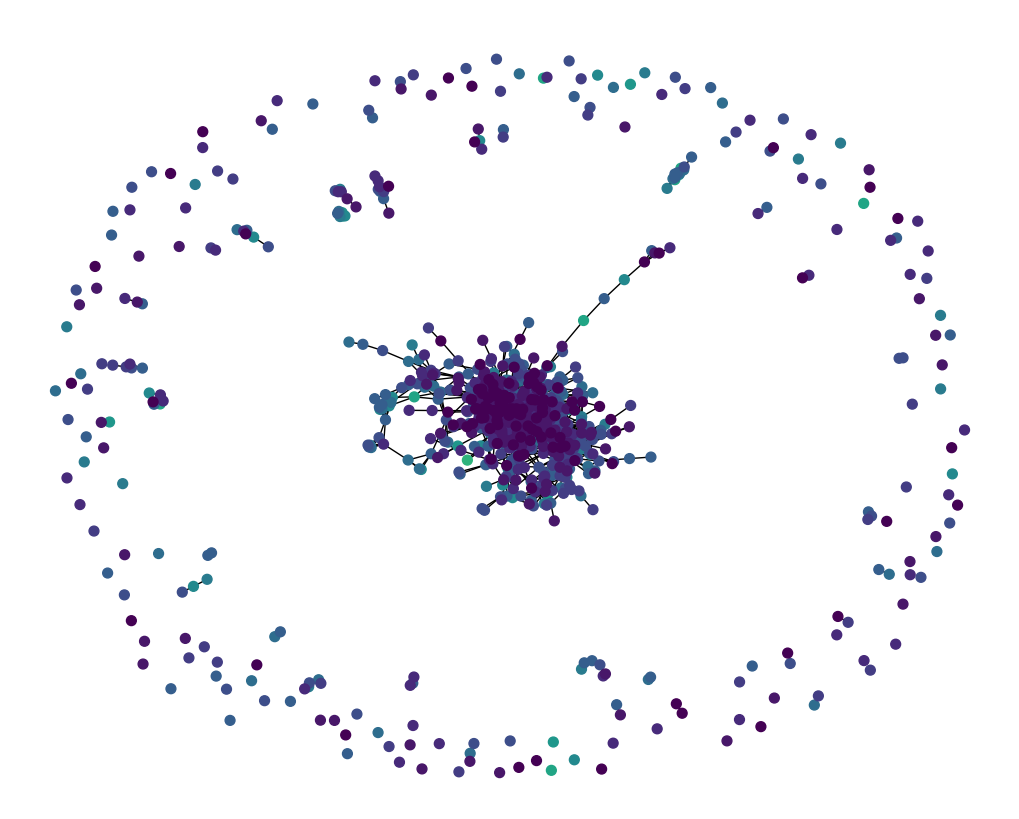

In [21]:
# Darker colours = Lower IMDB
# Lighter colours = Higher IMDB

imdb_scores = []
for row in rows:
    imdb_scores.append(row[3])

imdb_max = max(imdb_scores)
imdb_min = min(imdb_scores)

print("Max IMDB:", imdb_max)
print("Min IMDB:", imdb_min)

norm = plt.Normalize(imdb_min, imdb_max)
cmap = cm.get_cmap('viridis')

node_colors = [cmap(norm(score)) for score in imdb_scores]

plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
nx.draw(G, node_color=node_colors, node_size=50)

# Network 3: Director

In [23]:
rows = []
G = nx.Graph()

# Getting eaching movies name, stars (in one array) and genre
for index, row in df.iterrows():
    rows.append((row["Series_Title"], row["Director"], row["Released_Year"], row["IMDB_Rating"], row["Meta_score"]))
    G.add_node(row["Series_Title"], director=row["Director"], year=row["Released_Year"], IMDB=row["IMDB_Rating"], meta=row["Meta_score"])


titles = [movie[0] for movie in rows]   

# Create edges between movies with the same actors. Weight of the edge is equal to the number of shared actors between the movies
for i in range(len(titles)):
    for j in range(i+1, len(titles)):
        if rows[i][1] == rows[j][1]:
            G.add_edge(rows[i][0], rows[j][0])

In [24]:
degree_sequence = sorted(((d, n) for n, d in G.degree()), reverse=True)
print("Movies top 25 movies with the most connections")
for degree, movie in degree_sequence[0:25]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    string_four = "\tIMDB: " + str(G.nodes[movie]['IMDB'])
    string_five = "\tMeta: " + str(G.nodes[movie]['meta'])
    string_six = "\Director: " + str(G.nodes[movie]['director'])
    print( '{:<50s} {:<15s} {:<10s} {:<10s} {:<10s} {:<50s}'.format(string_one, string_two, string_three, string_four, string_five, string_six) )

print("")

for degree, movie in degree_sequence[len(degree_sequence)-24:]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    string_four = "\tIMDB: " + str(G.nodes[movie]['IMDB'])
    string_five = "\tMeta: " + str(G.nodes[movie]['meta'])
    string_six = "\Director: " + str(G.nodes[movie]['director'])
    print( '{:<50s} {:<15s} {:<10s} {:<10s} {:<10s} {:<50s}'.format(string_one, string_two, string_three, string_four, string_five, string_six) )

Movies top 25 movies with the most connections
Movie: Vertigo                                     Degree: 13      	Year: 1958 	IMDB: 8.3 	Meta: 100.0 \Director: Alfred Hitchcock                       
Movie: The Lady Vanishes                           Degree: 13      	Year: 1938 	IMDB: 7.8 	Meta: 98.0 \Director: Alfred Hitchcock                       
Movie: The Birds                                   Degree: 13      	Year: 1963 	IMDB: 7.7 	Meta: 90.0 \Director: Alfred Hitchcock                       
Movie: The 39 Steps                                Degree: 13      	Year: 1935 	IMDB: 7.6 	Meta: 93.0 \Director: Alfred Hitchcock                       
Movie: Strangers on a Train                        Degree: 13      	Year: 1951 	IMDB: 7.9 	Meta: 88.0 \Director: Alfred Hitchcock                       
Movie: Shadow of a Doubt                           Degree: 13      	Year: 1943 	IMDB: 7.8 	Meta: 94.0 \Director: Alfred Hitchcock                       
Movie: Rope                       

Max IMDB: 9.3
Min IMDB: 7.6


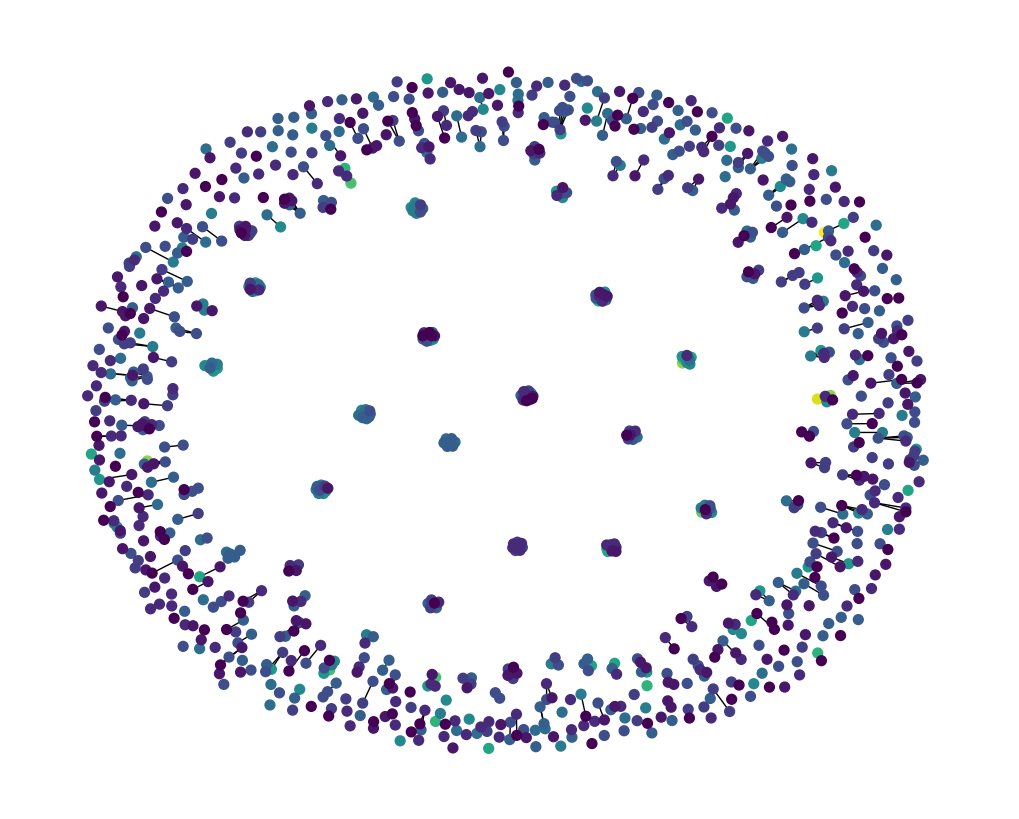

In [39]:
# Darker colours = Lower IMDB
# Lighter colours = Higher IMDB

imdb_scores = []
for row in rows:
    imdb_scores.append(row[3])

imdb_max = max(imdb_scores)
imdb_min = min(imdb_scores)

print("Max IMDB:", imdb_max)
print("Min IMDB:", imdb_min)

norm = plt.Normalize(imdb_min, imdb_max)
cmap = cm.get_cmap('viridis')

node_colors = [cmap(norm(score)) for score in imdb_scores]

pos = nx.spring_layout(G, k=0.06)
plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
nx.draw(G, node_color=node_colors, node_size=50, pos=pos)


Average IMDB score difference between connected nodes: 0.30008517887564035
Average IMDB score difference between all nodes: 0.2996078415619927


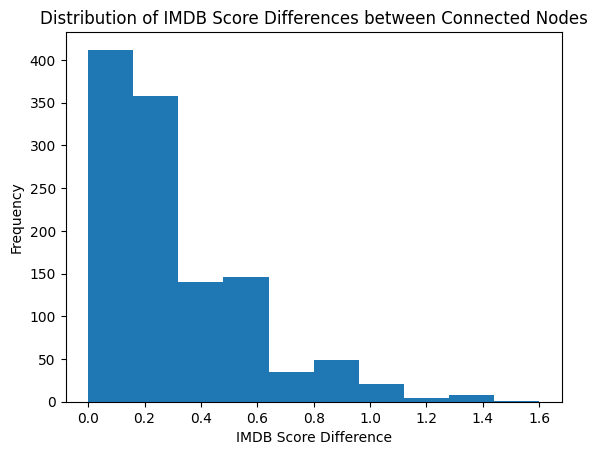

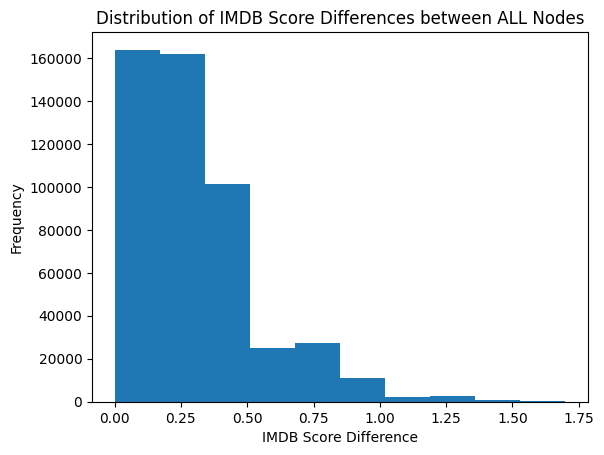

In [45]:
# Code below created by AI (with human edits)

# Create a dictionary to map node identifiers to indices
node_to_index = {node: index for index, node in enumerate(G.nodes())}

# Calculate IMDB score differences for connected edges
score_differences = []
for edge in G.edges():
    node1, node2 = edge
    index1 = node_to_index[node1] 
    index2 = node_to_index[node2]
    score_diff = abs(imdb_scores[index1] - imdb_scores[index2])
    score_differences.append(score_diff)


# Calculate IMDB score differences for all pairs of nodes
score_differences_all = []
for i in range(len(imdb_scores)):
    for j in range(i + 1, len(imdb_scores)):  # Avoid redundant comparisons
        score_diff = abs(imdb_scores[i] - imdb_scores[j])
        score_differences_all.append(score_diff)

# Analyze the distribution of score differences
avg_diff = sum(score_differences) / len(score_differences)
avg_diff_all = sum(score_differences_all) / len(score_differences_all)
print("Average IMDB score difference between connected nodes:", avg_diff)
print("Average IMDB score difference between all nodes:", avg_diff_all)

# (Optional) Create a histogram to visualize the distribution
plt.hist(score_differences, bins=10)
plt.xlabel("IMDB Score Difference")
plt.ylabel("Frequency")
plt.title("Distribution of IMDB Score Differences between Connected Nodes")
plt.show()

# (Optional) Create a histogram to visualize the distribution
plt.hist(score_differences_all, bins=10)
plt.xlabel("IMDB Score Difference")
plt.ylabel("Frequency")
plt.title("Distribution of IMDB Score Differences between ALL Nodes")
plt.show()

The director of the movie did not generally cause a more consisent IMDB score. The average difference in IMDB scores is actually lower when comparing each movie to every other movie than only comparing two movies if they had the same director.

# Kevin Bacon Number

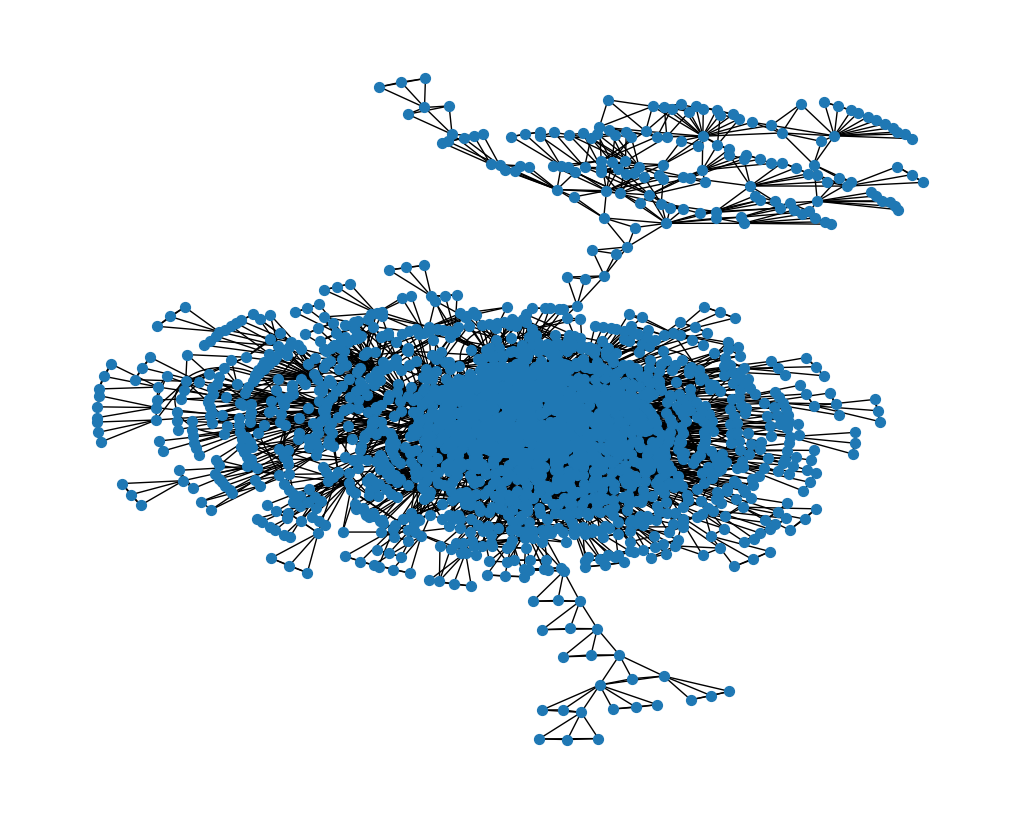

In [61]:
rows = []
G = nx.Graph()

# Getting eaching movies name, stars (in one array) and genre
for index, row in df.iterrows():
    if not G.has_node(row["Star1"]):
        G.add_node(row["Star1"])
    if not G.has_node(row["Star2"]):
        G.add_node(row["Star2"])
    if not G.has_node(row["Star3"]):
        G.add_node(row["Star3"])
    if not G.has_node(row["Star4"]):
        G.add_node(row["Star4"])
    G.add_edge(row["Star1"], row["Star2"])
    G.add_edge(row["Star1"], row["Star3"]) 
    G.add_edge(row["Star1"], row["Star4"]) 
    G.add_edge(row["Star2"], row["Star3"]) 
    G.add_edge(row["Star2"], row["Star4"])
    G.add_edge(row["Star3"], row["Star4"])
    
    #rows.append((row["Series_Title"], [row["Star1"], row["Star2"], row["Star3"], row["Star4"]], row["Released_Year"]))
    #G.add_node(row["Series_Title"], genre=row["Genre"], year=row["Released_Year"])
                
        


pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
nx.draw(G, node_size=50, pos=pos)
    

        
#titles = [movie[0] for movie in rows]   

# Create edges between movies with the same actors. Weight of the edge is equal to the number of shared actors between the movies
#for i in range(len(titles)):
#    for j in range(i+1, len(titles)):
#        weight = len(set(rows[i][1]).intersection(set(rows[j][1])))
#        if weight >= 1:
#            G.add_edge(rows[i][0], rows[j][0], weight=weight)

In [62]:
degree_sequence = sorted(((d, n) for n, d in G.degree()), reverse=True)
print("Actors top/bottom 25 most connections to other actors")
for degree, actor in degree_sequence[0:25]:
    string_one = "Actor: " + actor
    string_two = "Degree: " + str(degree)
    print( '{:<50s} {:<15s}'.format(string_one, string_two) )

print("")

for degree, actor in degree_sequence[len(degree_sequence)-24:]:
    string_one = "Actor: " + actor
    string_two = "Degree: " + str(degree)
    print( '{:<50s} {:<15s}'.format(string_one, string_two) )

Actors top/bottom 25 most connections to other actors
Actor: Robert De Niro                              Degree: 45     
Actor: Tom Hanks                                   Degree: 38     
Actor: Brad Pitt                                   Degree: 36     
Actor: Al Pacino                                   Degree: 35     
Actor: Clint Eastwood                              Degree: 33     
Actor: Leonardo DiCaprio                           Degree: 32     
Actor: Matt Damon                                  Degree: 31     
Actor: Christian Bale                              Degree: 31     
Actor: James Stewart                               Degree: 30     
Actor: Johnny Depp                                 Degree: 27     
Actor: Denzel Washington                           Degree: 27     
Actor: Michael Caine                               Degree: 25     
Actor: Humphrey Bogart                             Degree: 25     
Actor: Ethan Hawke                                 Degree: 25     
Actor: S